# DTSC-670 Foundations of Machine Learning
## Assignment: Polynomial Regression
### Name: Kurt Brown

## Copyright & Academic Integrity Notice
<span style="color:red">This material is for enrolled students' academic use only and protected under U.S. Copyright Laws. This content must not be shared outside the confines of this course, in line with Eastern University's academic integrity policies. Unauthorized reproduction, distribution, or transmission of this material, including but not limited to posting on third-party platforms like GitHub, is strictly prohibited and may lead to disciplinary action. You may not alter or remove any copyright or other notice from copies of any content taken from BrightSpace or Eastern University’s website.</span>
 
<span style="color:red">© Copyright Notice 2024, Eastern University - All Rights Reserved.</span> 

## Student Learning Objectives
- Analyze the performance of linear and polynomial regression models when applied to non-linear datasets.
- Train a Support Vector Machine regression model using a polynomial kernel.
- Perform a grid search to discover the best hyperparameter for the SVM model.

## CodeGrade
This assignment will be automatically graded through CodeGrade, and you will have unlimited submission attempts. To ensure successful grading, please follow these instructions carefully: Name your notebook as `polynomial_regression_assignment.ipynb` before submission, as CodeGrade requires this specific filename for grading purposes. Additionally, make sure there are no errors in your notebook, as CodeGrade will not be able to grade it if errors are present. Before submitting, we highly recommend restarting your kernel and running all cells again to ensure that there will be no errors when CodeGrade runs your script.

## Assignment Overview
In this assignment you will analyze the performance of linear and polynomial regression models when applied to a non-linear dataset. 

### Data
The data used for this assignment was generated using a specific equation, with the inclusion of random noise. By the conclusion of this assignment, you will be able to approximate the original coefficients used in creating the data with a high degree of accuracy. Nonetheless, owing to the presence of this added noise in the dataset, our models may get very close to identifying the "true model parameters," but they will not be exact. This underscores the fact that inherent noise in datasets typically prevent our models from precisely finding the true parameters - although they can sometimes get very close.

Please download the `polynomial_regression_data.csv` file from Brightspace and put it in the same folder as this notebook.

### Assignment Instructions
Walk through the assignment and follow the directions as requested.  <span style="color:red">**Please note that in this assignment, we will provide fewer step-by-step instructions than in previous assignments, as you have gained proficiency in working through machine learning tasks and to prepare you for the final project.**</span>

Once you have completed all the tasks, you are ready to submit your assignment to CodeGrade for testing. Please restart your notebook's kernel and run your code from the beginning to ensure there are no error messages. Once you have verified that the code runs without any issues, submit your .ipynb notebook file to CodeGrade for evaluation. Your notebook should be called `polynomial_regression_assignment.ipynb`. You have unlimited attempts for this assignment. 

## Standard Imports<a name="import"></a>
Run the code block below to import your standard imports and setup the notebook for CodeGrade grading.

In [1]:
# standard imports
import pandas as pd
import numpy as np

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)
import warnings
warnings.filterwarnings("ignore")

## Get the Data
**Exercise 1:** In the code block below, import the `polynomial_regression_data.csv` file.

In [2]:
### ENTER CODE HERE ###
poly_reg_data = pd.read_csv('polynomial_regression_data.csv')

Take some time to review the DataFrame and check the data's descriptive statistics.  Especially note the mean target value for later in the project when comparing RMSE scores.

In [3]:
### ENTER CODE HERE ###
poly_reg_data.describe()

,feature_1,feature_2,target
count,500.000000,500.000000,500.000000
mean,0.331085,0.370986,1288.140419
std,11.873084,11.957826,2023.696714
min,-19.995425,-20.929340,-1016.790557
25%,-10.024144,-10.387657,-574.059332
50%,1.336373,1.350543,759.116940
75%,10.688729,10.652467,2877.344880
max,19.892914,21.232477,6367.691029


In [4]:
# check descriptive statistics
# note the mean target value for later in the project when comparing RMSE

### ENTER CODE HERE
poly_reg_data['target'].mean()

1288.1404194200798

This dataset comprises two features identified as `feature_1` and `feature_2`, in addition to the `target` column. The data consists of 500 instances.

**Exercise 2:** Create a training and a test set.  Allocate 80% of the instances for training and 20% for testing.  Set the random state to 42 to ensure reproducibility of our results.  Assign the resulting DataFrames the following names: `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
### ENTER CODE HERE ###
from sklearn.model_selection import train_test_split

X = poly_reg_data[['feature_1', 'feature_2']]

y = poly_reg_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we will visualize our training data from four different perspectives to gain a deeper understanding of its underlying patterns. While not mandatory, I recommend going through the plotting code to familiarize yourself with it. Proficiency in creating various data visualizations is a valuable skill to develop.

Run the following block of code to plot the data.  You'll notice that our data doesn't conform to a linear pattern.

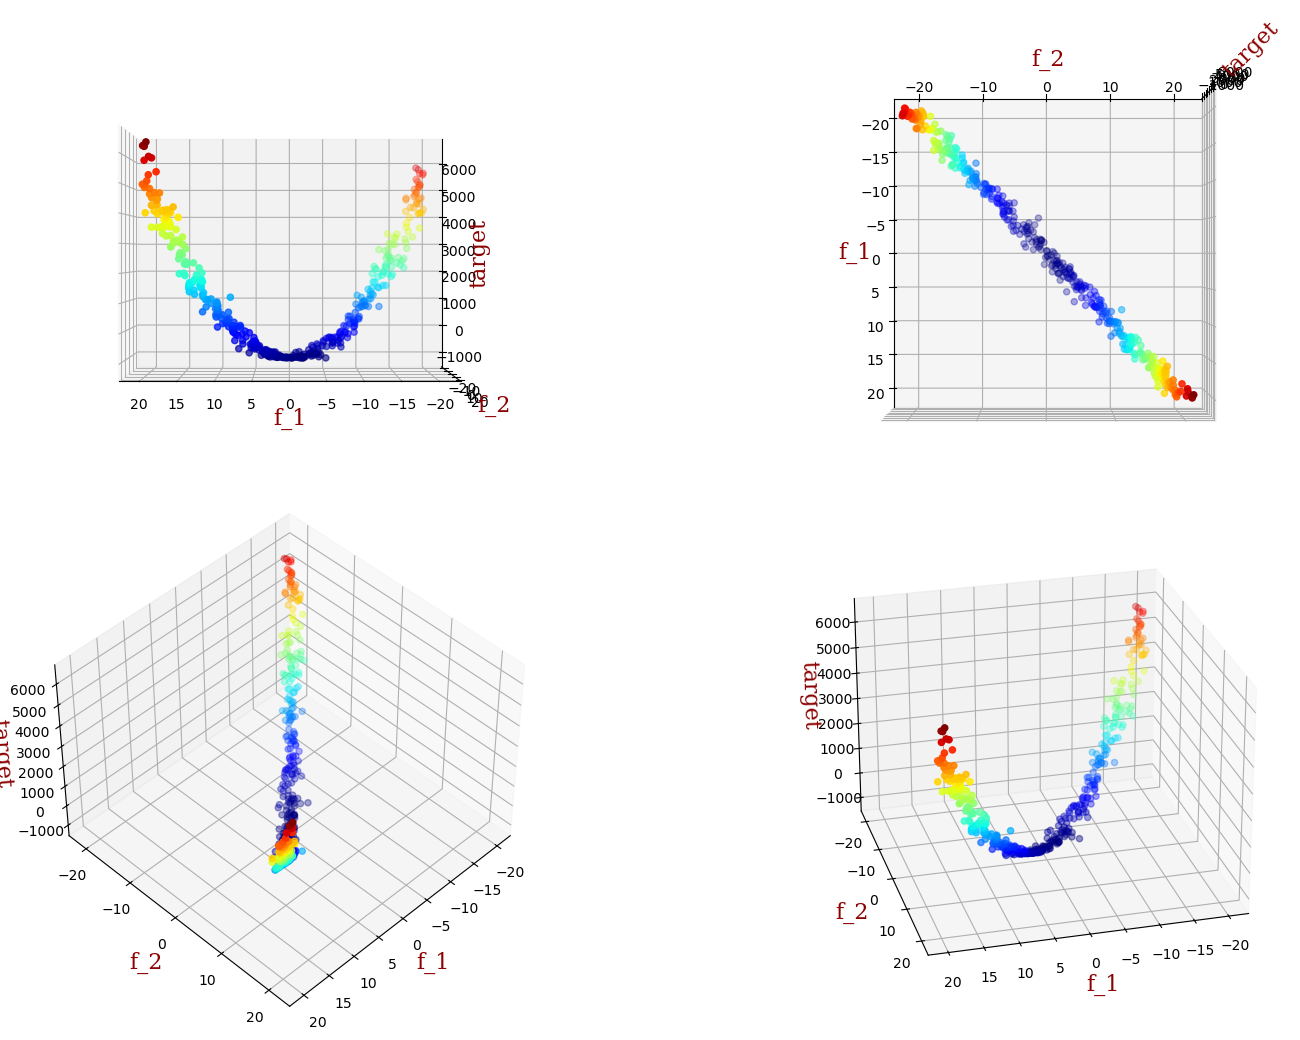

In [6]:
### Run this code block to plot your data ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# setup the data
feature_1 = X_train['feature_1']
feature_2 = X_train['feature_2']
target = y_train

fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## Train Linear Regression Model
From the plots above, it's evident that our data doesn't exhibit a linear relationship. Nonetheless, in the following code section, we will apply a standard linear model to the data and visualize the regression line. This will serve as an educational illustration of how the standard linear regression model poorly fits the data.

**Exercise 3:** Create an instance of the LinearRegression() class and call this model `lin_reg`.  Fit this model to the training data.

In [7]:
### ENTER CODE HERE ###
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

**Exercise 4:** Let's see how well the standard linear regression model fits our data.  Perform a 4-fold cross validation using the above linear regression model and your training data to get the RMSE scores.  Save this output of scores as a Series and use the `describe` method to see the descriptive stats of these scores.  Save the descriptive stats from the Series as `lin_reg_cv_stats`.

In [8]:
### ENTER CODE HERE ###
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

rmse_scores = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

lin_reg_cv_score = cross_val_score(lin_reg, X_train, y_train, cv=4, scoring=rmse_scores)

lin_reg_cv_score = pd.Series(-lin_reg_cv_score)

lin_reg_cv_stats = lin_reg_cv_score.describe()

Next, we will replot our training data, this time incorporating the regression line generated by the `lin_reg` model. As previously indicated by the high mean RMSE score displayed earlier, you'll observe that the regression line doesn't align well with the data.

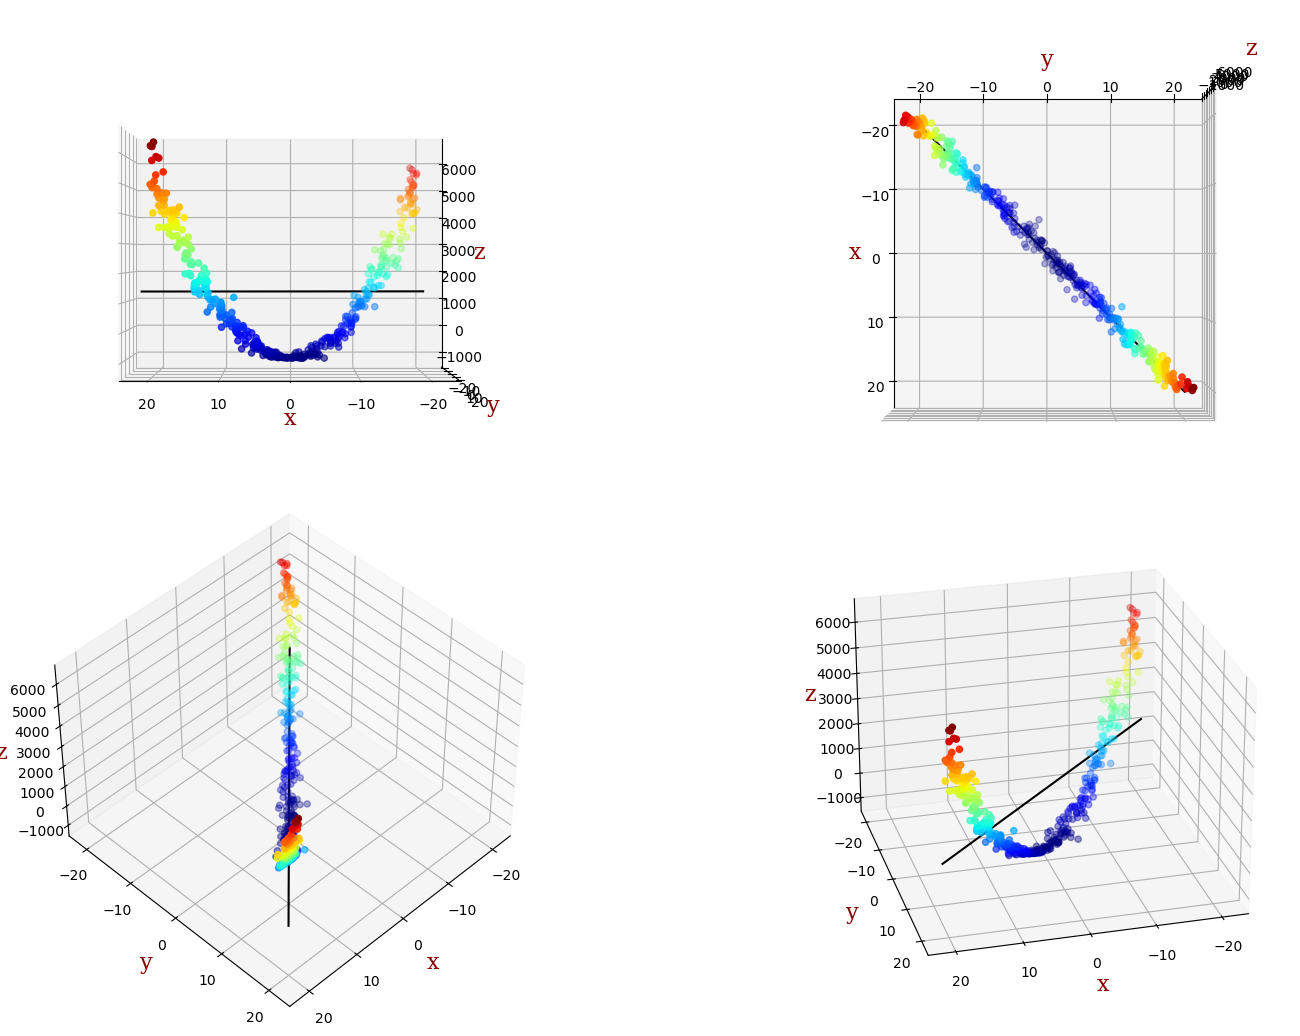

In [9]:
### Run code block to plot data and regression line ###

# Plot Curve Fit
x_fit = np.linspace(-21,21,400)
y_fit = x_fit

test_df = pd.DataFrame({'feature_1': x_fit,
                        'feature_2': y_fit})

z_fit = lin_reg.predict(test_df)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#===============
#  First subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## Perform Polynomial Regression
Next, let's see what happens when we perform a polynomial transformation on our features.

**Exercise 5:**
1) Utilizing Scikit-learn's [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class, create a 2nd-degree polynomial instance, and name this object `poly`. Include the parameter `include_bias=False`.
2) Using your instantiated class (`poly`), transform your `X_train` data and name this `X_train_transformed`.

In [10]:
### ENTER CODE HERE ###
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_transformed = poly.fit_transform(X_train)

Run the following code to get the feature names for the transformed data.

In [11]:
# get feature names
poly.get_feature_names_out(X_train.columns)

array(['feature_1', 'feature_2', 'feature_1^2', 'feature_1 feature_2',
       'feature_2^2'], dtype=object)

We have created a new feature matrix that comprises all possible polynomial combinations of the input features, with degrees less than or equal to the specified degree.  Notice that we have the following combinations of features: feature_1, feature_2, feature_1 squared, feature_1 times feature_2, and feature_2 squared.  When applying a polynomial transformation to a dataset, especially one with a large number of features, it's crucial to exercise caution. This is because the transformation can lead to a significant increase in the number of features, potentially causing issues related to feature explosion.

**Exercise 6:** Create another instance of a LinearRegression() class and call this model `poly_reg`.  Fit this model using the `X_train_transformed` and `y_train` data.

In [12]:
### ENTER CODE HERE ###
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()

poly_reg.fit(X_train_transformed, y_train)

LinearRegression()

**Exercise 7:** Similar to Exercise 4, let's see how well the `poly_reg` model fits our data.  Perform a 4-fold cross validation using the above `poly_reg` model and your transformed training data to get the RMSE scores.  Save this output of scores as a Series and use the `describe` method to see the descriptive stats of these scores.  Save the descriptive stats from the Series as `poly_reg_cv_stats`.

In [13]:
### ENTER CODE HERE ###
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

poly_cv_score = cross_val_score(poly_reg, X_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=4)

poly_cv_score = -poly_cv_score

poly_cv_score_series = pd.Series(poly_cv_score)

poly_reg_cv_stats = poly_cv_score_series.describe()

poly_reg_cv_stats

count    4.000000
mean     0.995669
std      0.074375
min      0.897165
25%      0.964417
50%      1.006615
75%      1.037868
max      1.072281
dtype: float64

Wow! Observe the substantial reduction in the mean RMSE score when compared to the standard linear regression model. Of course that should not be a surprise considering our data's second-degree polynomial shape.

Now, let's visualize this regression line and assess how well it conforms to our data.

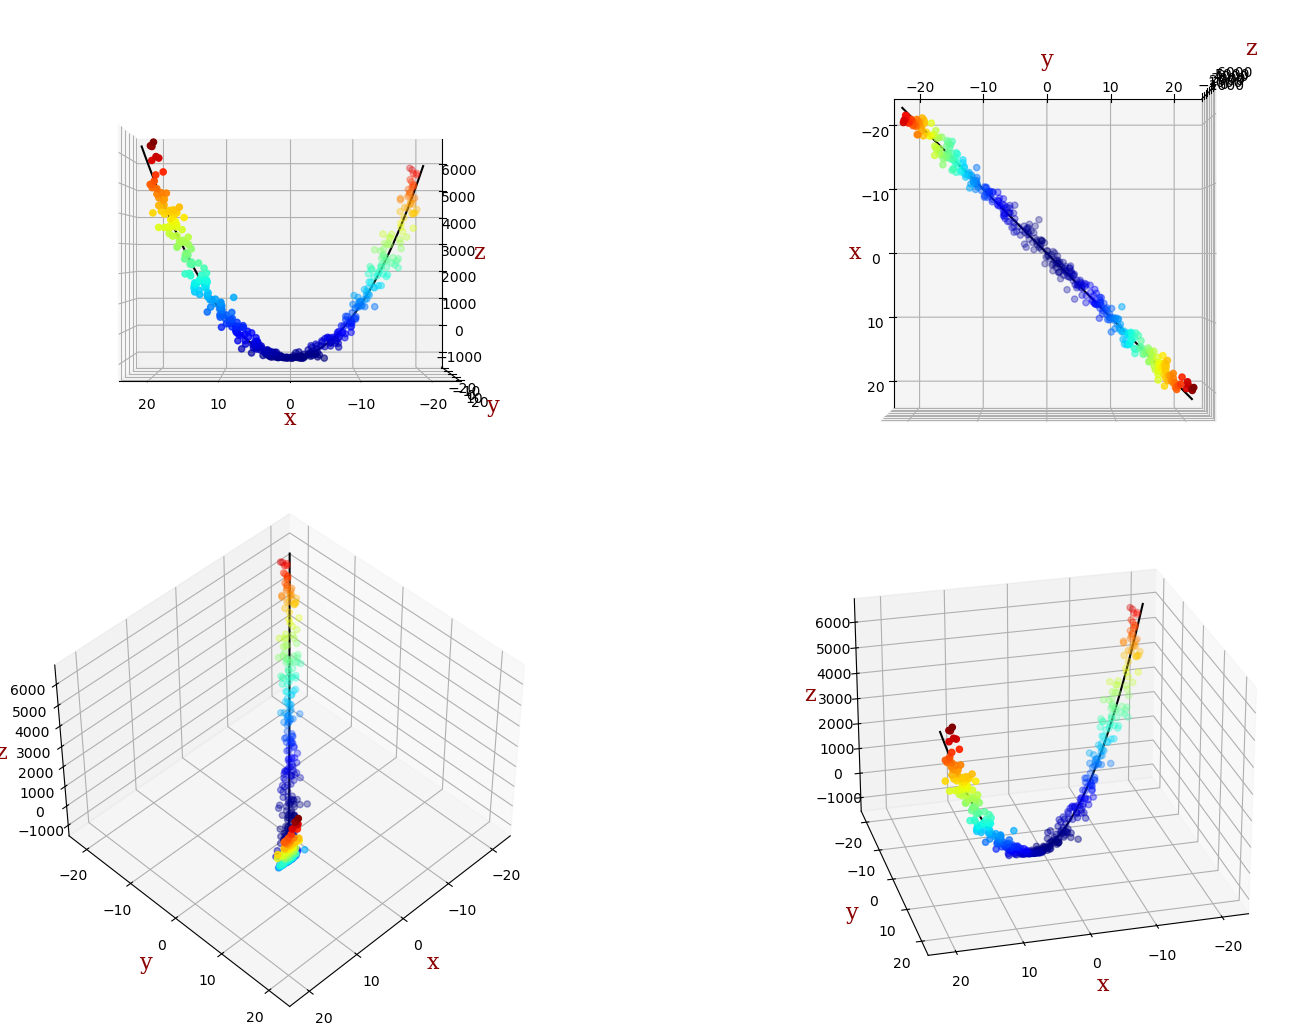

In [14]:
### Run the following code block to plot the data and visualize the new regression line ###

# Plot Curve Fit
x_fit = np.linspace(-21,21,400)
y_fit = x_fit

test_df_poly = pd.DataFrame({'feature_1': x_fit,
                        'feature_2': y_fit})

poly_test_df = poly.transform(test_df_poly)
poly_test_df = pd.DataFrame(poly_test_df)

z_fit = poly_reg.predict(poly_test_df)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#===============
#  First subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## SVM with Polynomial Kernel
Now that we've seen the strong fit of our polynomial regression model with our data, let's explore the application of the Support Vector Machine regression algorithm to compare the results. We'll employ grid search to identify the optimal hyperparameters for C and epsilon.

**Exercise 8:** Similar to how the grid search was performed in previous assignments, create an instance of Scikit-Learn's `SVR()` class. Set the `kernel` hyperparameter to `poly` and the `degree` to `2`.  Perform a grid search for the `C` and `epsilon` hyperparameters and call your grid search object `grid_search_cv_svm`.  The values of `C` that you will search are: .01, 10, and 100.  The values of `epsilon` that you will search are: .001, .10, .50, and 1.  Your grid search should utilize a cross-fold of 4 and set `verbose` equal to 1.  Save the best model from the grid search as `svm_model`.

In [15]:
### ENTER CODE HERE ###
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm = SVR(kernel='poly', degree=2)

svm_grid = {
    'C': [0.01, 10, 100], 
    'epsilon': [0.001, 0.10, 0.50, 1]
}

grid_search_cv_svm = GridSearchCV(
    svm, 
    svm_grid, 
    cv=4, 
    verbose=1
)

grid_search_cv_svm.fit(X_train, y_train)

svm_model = grid_search_cv_svm.best_estimator_

svm_model

Fitting 4 folds for each of 12 candidates, totalling 48 fits


SVR(C=100, degree=2, epsilon=0.001, kernel='poly')

**Exercise 9:** Let's see how well the `svm_model` model fits our data.  Perform a 4-fold cross validation using the above `svm_model` model and your original training data to get the RMSE scores.  Save this output of scores as a Series and use the `describe` method to see the descriptive stats of these scores.  Save the descriptive stats from the Series as `svm_cv_stats`.

In [19]:
### ENTER CODE HERE ###
from sklearn.model_selection import cross_val_score

svm_cv_score = cross_val_score(
    svm_model, 
    X_train, 
    y_train, 
    scoring='neg_root_mean_squared_error',
    cv=4
)

svm_cv_score = pd.Series(-svm_cv_score)

svm_cv_stats = svm_cv_score.describe()

svm_cv_stats

count      4.000000
mean     170.751890
std       13.108030
min      161.018646
25%      161.911691
50%      166.296297
75%      175.136496
max      189.396321
dtype: float64

The Support Vector Machines model doesn't perform as well as the polynomial regression model but it still performs drastically better than the standard linear regression model.  Since the polynomial regression model performs the best, we will continue using that model below.

## True Model Parameters
In the data description section we mentioned that the model will come close to the true model parameters, but due to the noise in the data, it will not be exact.  First, let's run the code below to see the model parameters for the polynomial regression model.

In [17]:
# suppress scientific notation to make values easier to see
np.set_printoptions(suppress=True)

print("Computed Model Coefficients: ", poly_reg.coef_)
print("Computed Model Intercept : ", poly_reg.intercept_)

Computed Model Coefficients:  [ 7.96685049  0.03317992  0.00720856 -0.0176788  16.0099275 ]
Computed Model Intercept :  -999.9161615275884


Typically, in real-world scenarios, we wouldn't have access to the true model parameters. However, in this case, because we generated the data, we know that the actual model coefficients were 8 and 16, with an intercept of -1000. After eliminating coefficients that are close to zero, it is evident that our model closely approximates the true model parameters.

## Final Model Evaluation
**Exercise 10:**  We are now ready to compute the RMSE score using the test data. Transform the `X_test` data and name it `X_test_transformed` since any transformations applied to the training data must also be applied to the test data. Then, employing the `poly_reg` model, generate predictions on your transformed test set and name these predictions `final_predictions`. Calculate the final RMSE metric and round the result to two decimal places. Store the final RMSE value as `final_rmse`.

In [18]:
### ENTER CODE HERE ###
from sklearn.metrics import mean_squared_error

X_test_transformed = poly.transform(X_test)

final_predictions = poly_reg.predict(X_test_transformed)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

final_rmse = round(final_rmse, 2)

final_rmse

0.87